## Постановка задачи:

Прогнозирование погоды в Австралии

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по признаку, пойдет ли завтра дождь или нет.

Установливаем библиотеку Pandas:

In [1]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [3]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Выводим первые 10 строк dataset-а:

In [4]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


Выводим последние 10 строк dataset-а:

In [5]:
data.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145450,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
145451,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
145452,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
145453,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


### О наборе данных:

Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Ознакомимся с некоторыми свойствами Pandas.DataFrame на примере нашего dataset-а:

In [6]:
print(data.shape, end="\n\n")
print(data.columns, end="\n\n")
print(data.index, end="\n\n")
print(data.at[2, 'Location'], end="\n\n")
print(data["Location"][2], end="\n\n")
print(data["Location"].dtype, end="\n\n")
print(type(data["Location"]), end="\n\n")
print(type(data["Location"][2]), end="\n\n")

(145460, 23)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

RangeIndex(start=0, stop=145460, step=1)

Albury

Albury

object

<class 'pandas.core.series.Series'>

<class 'str'>



Выведем описательную статистику по нашему dataset-у:

In [7]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
data.describe(include = ['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [9]:
data.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [10]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Выведем матрицу корреляции наших численных признаков:

In [11]:
data.corr()

C:\Users\Nick\AppData\Local\Temp\ipykernel_25252\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


In [12]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

"c:\Program" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


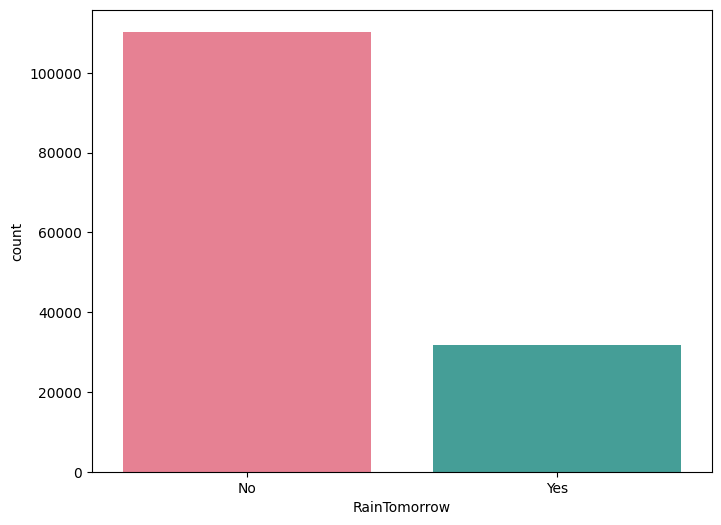

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x=data['RainTomorrow'],palette='husl');

Данные несбалансированы

C:\Users\Nick\AppData\Local\Temp\ipykernel_25252\2753953038.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f')


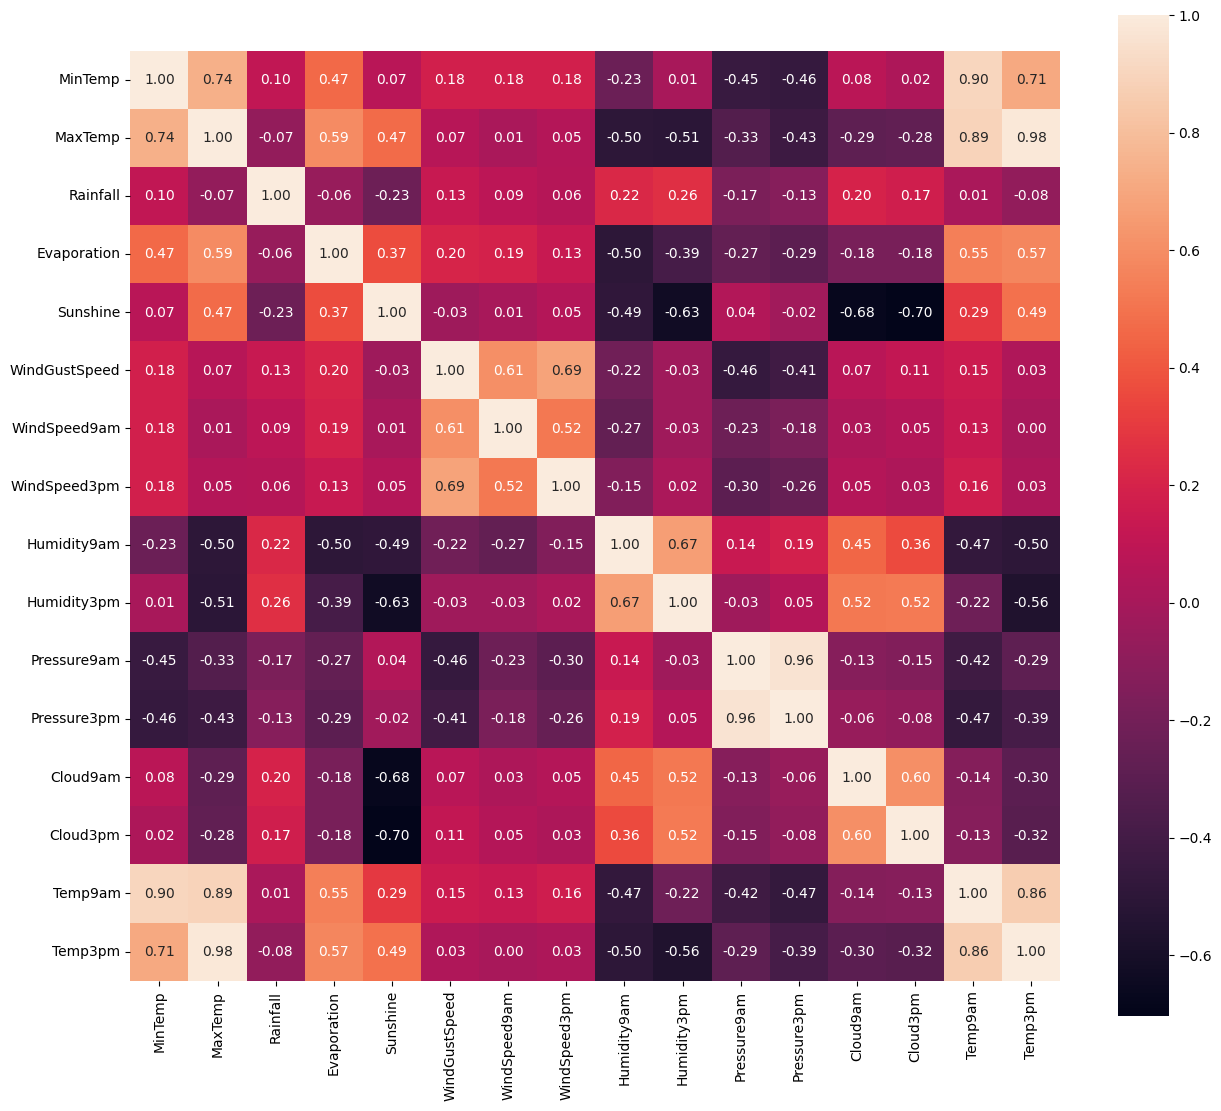

In [14]:
plt.figure(figsize=(15,13))
ax = sns.heatmap(data.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

Rain today ~ Rain tomorrow

<AxesSubplot: xlabel='RainToday', ylabel='count'>

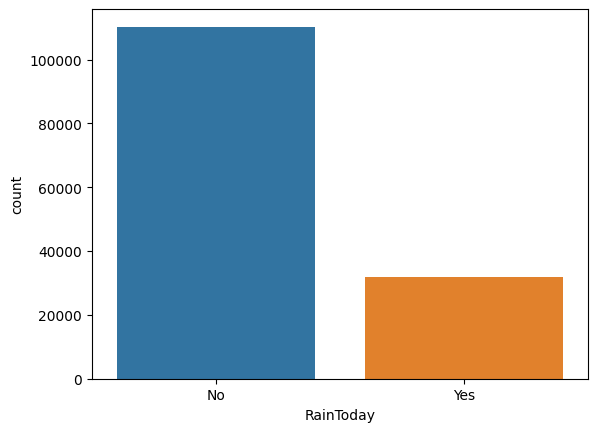

In [15]:
sns.countplot(x = data['RainToday'])

In [16]:
x=pd.crosstab(data['RainTomorrow'],data['RainToday'])
x

RainToday,No,Yes
RainTomorrow,,
No,92728,16858
Yes,16604,14597


In [17]:
y=x/x.transpose().sum().values.reshape(2,1)*100
y

RainToday,No,Yes
RainTomorrow,,
No,84.616648,15.383352
Yes,53.216243,46.783757


Если сегодня нет дождя, завтра дождь пойдет с вероятностью = 15%\
Если же дождь идет сегодня, вероятность дождя завтра = 46%

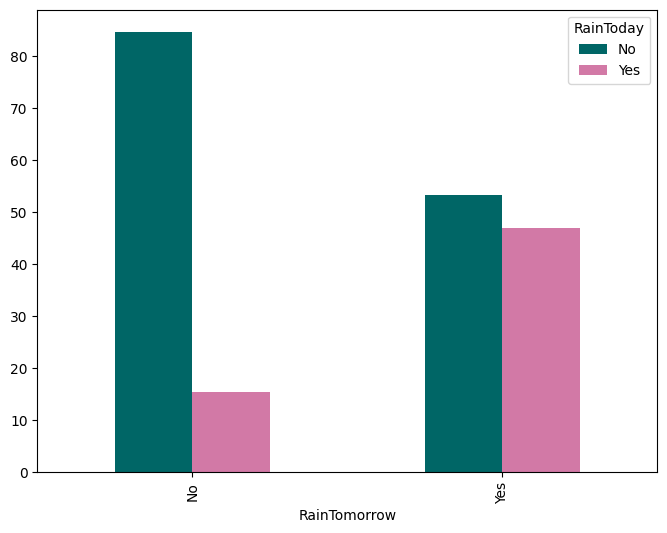

In [18]:
y.plot(kind="bar",figsize=(8,6),color=['#006666','#d279a6']);

Location ~ Rain today

In [19]:
x=pd.crosstab(data['Location'],data['RainToday']) 
x

RainToday,No,Yes
Location,,
Adelaide,2402,689
Albany,2114,902
Albury,2394,617
AliceSprings,2788,244
BadgerysCreek,2345,583
Ballarat,2247,781
Bendigo,2472,562
Brisbane,2452,709
Cairns,2038,950


In [20]:
# getting percentage of raining days and non raining days for each city 
y=x/x.transpose().sum().values.reshape((-1, 1))*100
y

RainToday,No,Yes
Location,,
Adelaide,77.709479,22.290521
Albany,70.092838,29.907162
Albury,79.508469,20.491531
AliceSprings,91.952507,8.047493
BadgerysCreek,80.088798,19.911202
Ballarat,74.207398,25.792602
Bendigo,81.476599,18.523401
Brisbane,77.570389,22.429611
Cairns,68.206158,31.793842


In [21]:
#sorting percentages by raining day percentage of each city
y=y.sort_values(by='Yes',ascending=True )
y

RainToday,No,Yes
Location,,
Woomera,93.246406,6.753594
Uluru,92.378449,7.621551
AliceSprings,91.952507,8.047493
Mildura,89.125374,10.874626
Cobar,87.081660,12.918340
Moree,86.194814,13.805186
Nhil,84.576163,15.423837
SalmonGums,84.027073,15.972927
Katherine,83.012821,16.987179


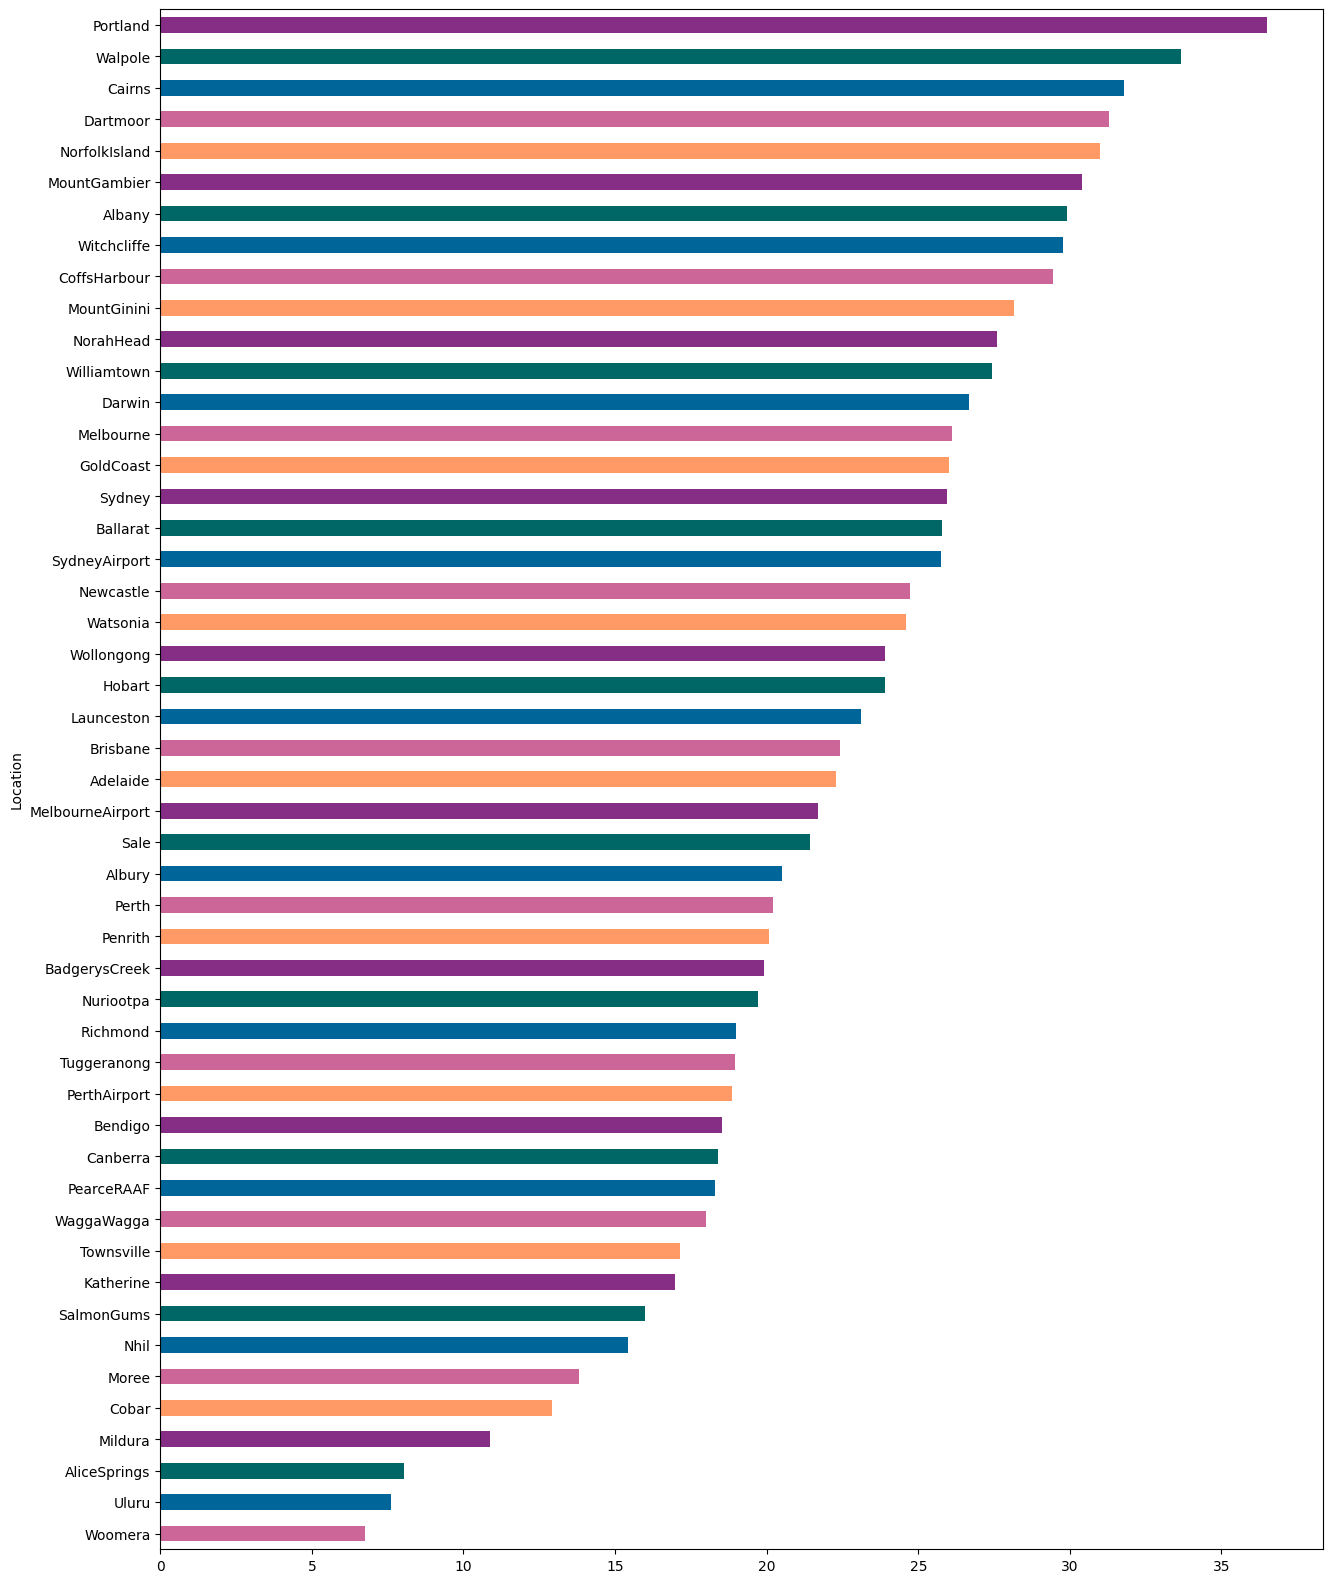

In [22]:
color=['#cc6699','#006699','#006666','#862d86','#ff9966'  ]
y.Yes.plot(kind="barh",figsize=(15,20),color=color);

Пойдет ли дождь зависит от местоположения -- в Портланде идет дождь 36% всех дней, а в Вумерсе - 6%

Как влияют влажность и давление на дождь завтра

In [23]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

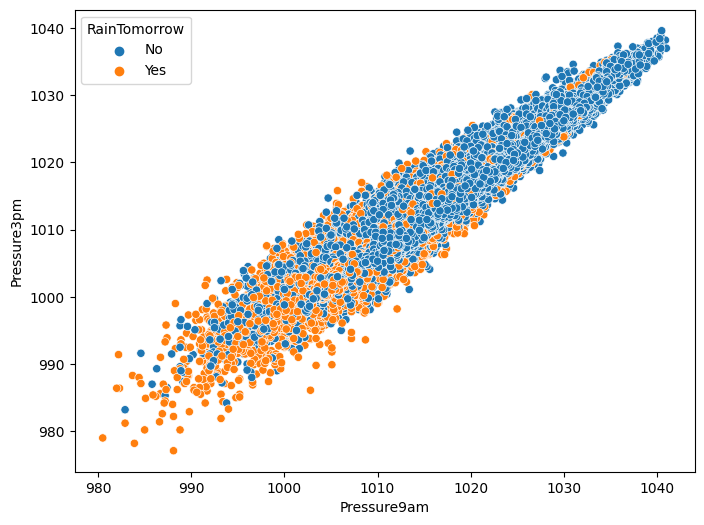

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Pressure9am',y='Pressure3pm',hue='RainTomorrow');

C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


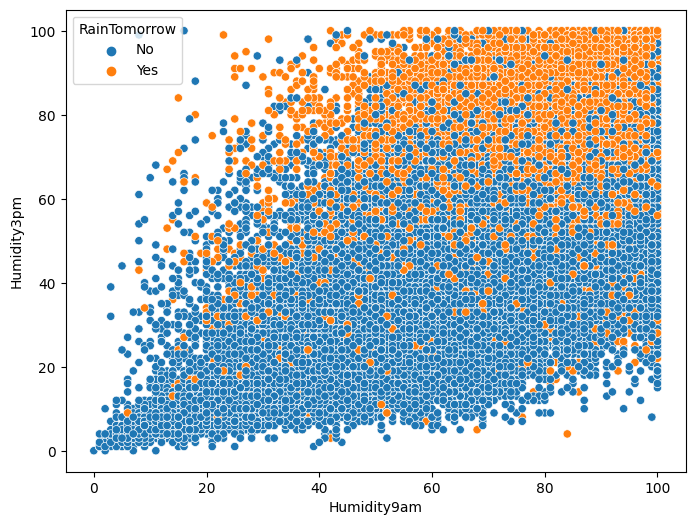

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Humidity9am',y='Humidity3pm',hue='RainTomorrow');

Низкое давление увеличивает шанс дождя завтра так же, как и высокая влажность, особенно влажность в 3 вечера

Влияет ли температура?

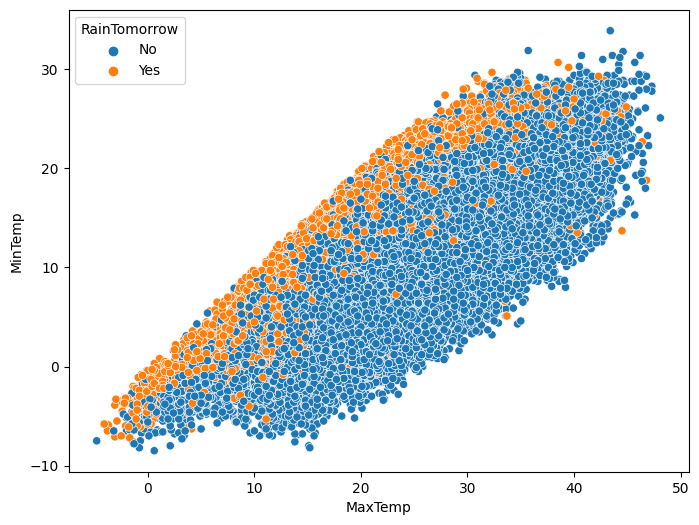

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MaxTemp', y='MinTemp', data=data, hue='RainTomorrow');

Шанс дождя завтра увеличивается, когда максимальная и минимальная температуры дня близки друг к другу

Влияние ливня и испарения

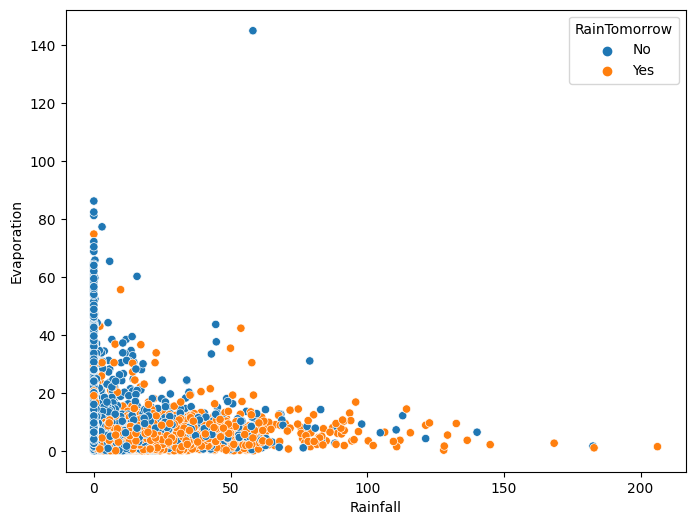

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Rainfall',y='Evaporation',hue='RainTomorrow');

Высокий уровень осадков увеличивает шанс дождя завтра

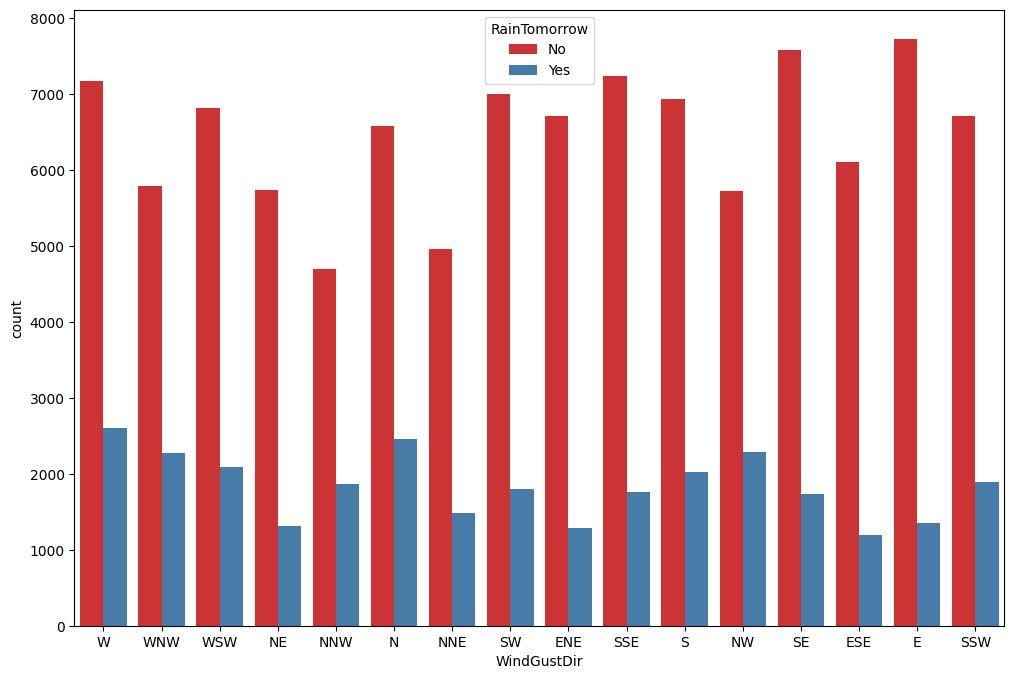

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(data=data,x='WindGustDir',hue='RainTomorrow',palette='Set1');

## Готовим данные

Обрабатываем пропущенные значения

In [29]:
data.isnull().sum()/data.shape[0]*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [30]:
# filling feature with large percentage of missing data using random choice 
lst=['Evaporation','Sunshine','Cloud9am','Cloud3pm']
for col in lst:
    fill_list = data[col].dropna()
    data[col] = data[col].fillna(pd.Series(
        np.random.choice(fill_list , size = len(data.index))))
#categorical features
s = (data.dtypes == "object")
object_cols = list(s[s].index)

In [31]:
for i in object_cols:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [32]:
#numeric features
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

In [33]:
for i in num_cols:
    data[i].fillna(data[i].median(), inplace=True)

In [34]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Обрабатываем выбросы

In [35]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

MinTemp


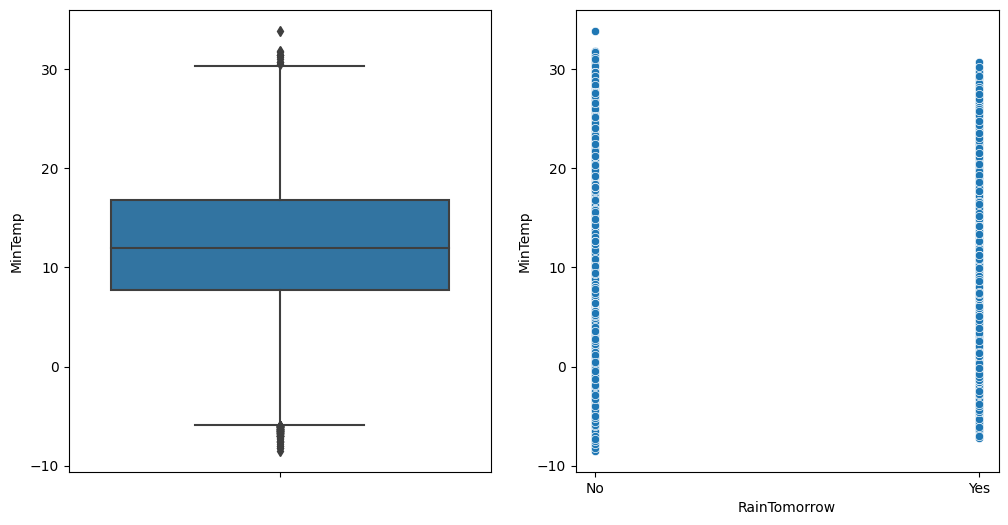

MaxTemp


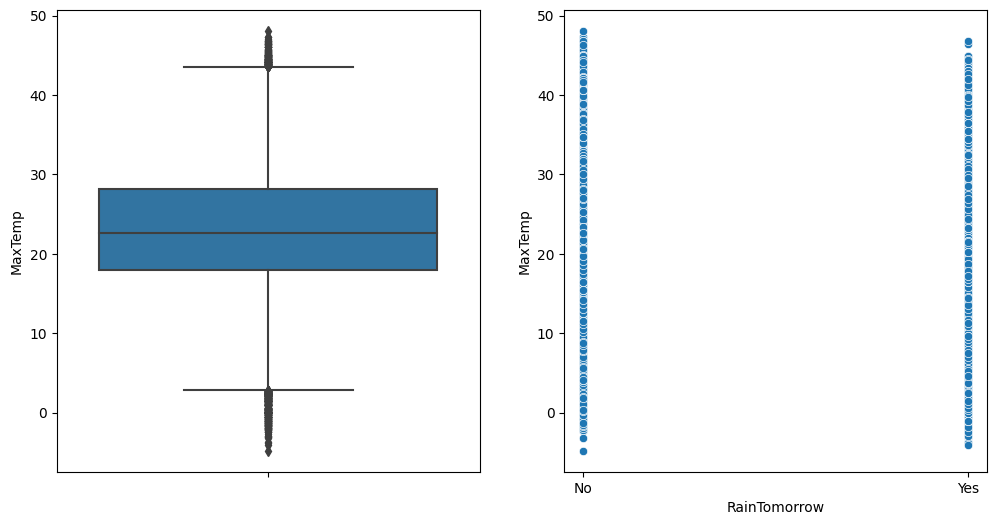

Rainfall


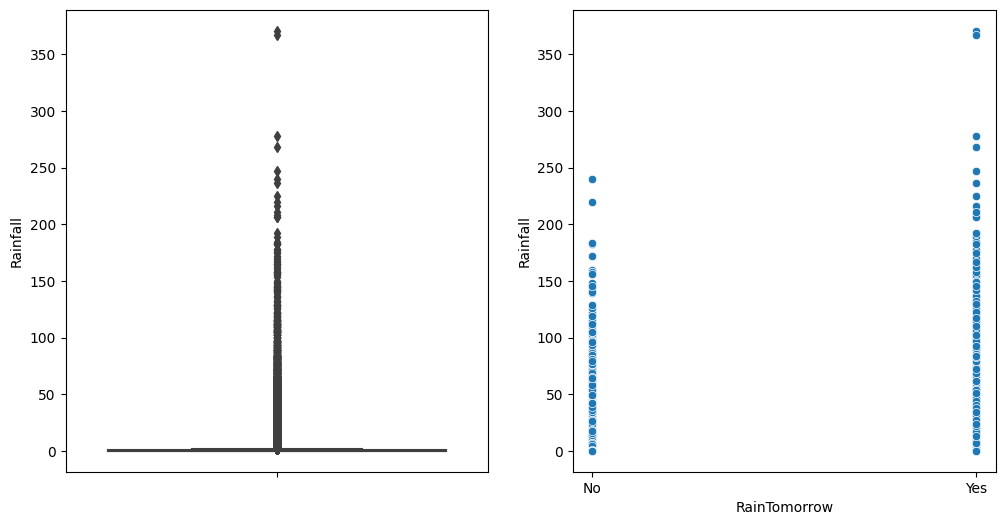

Evaporation


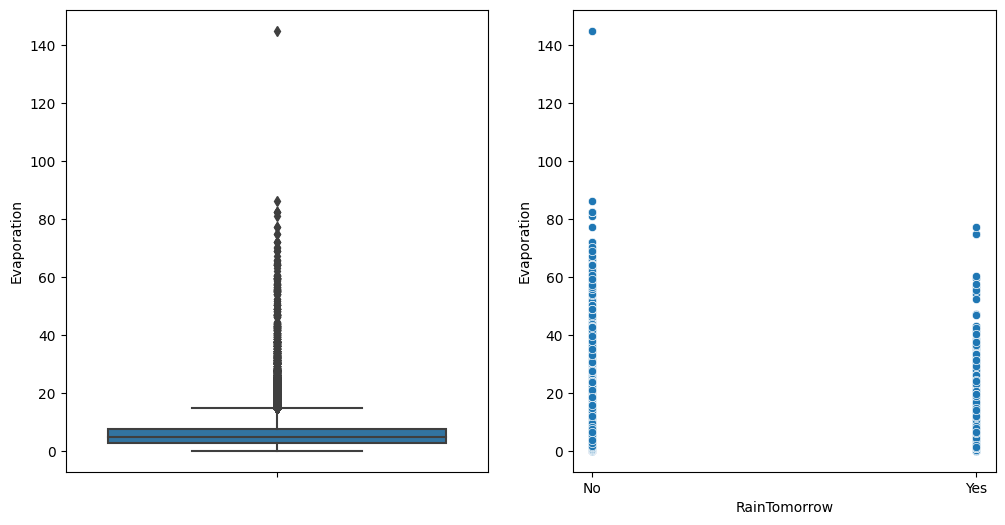

Sunshine


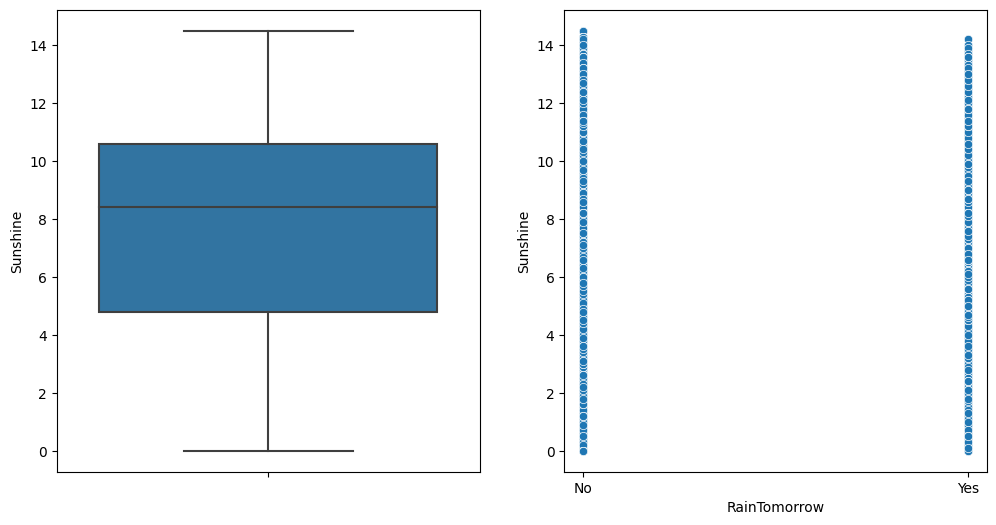

WindGustSpeed


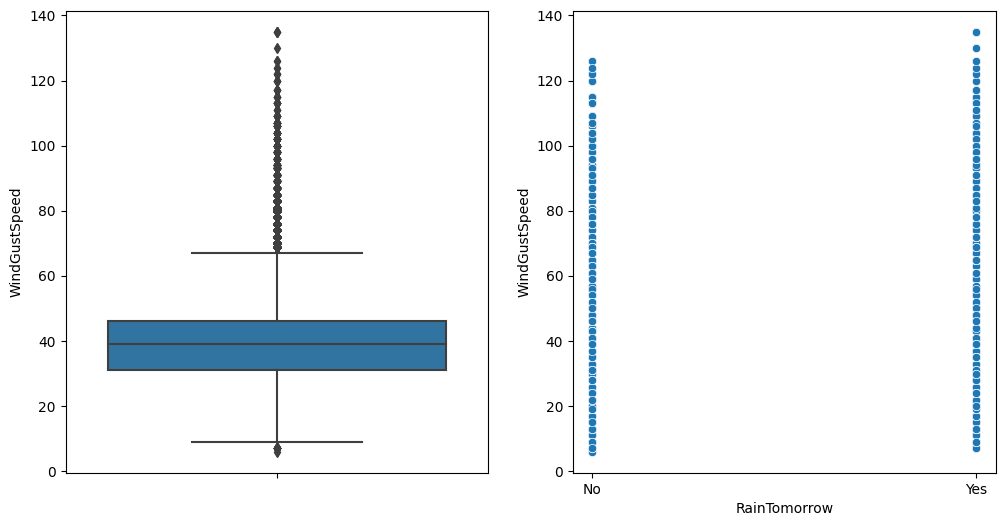

WindSpeed9am


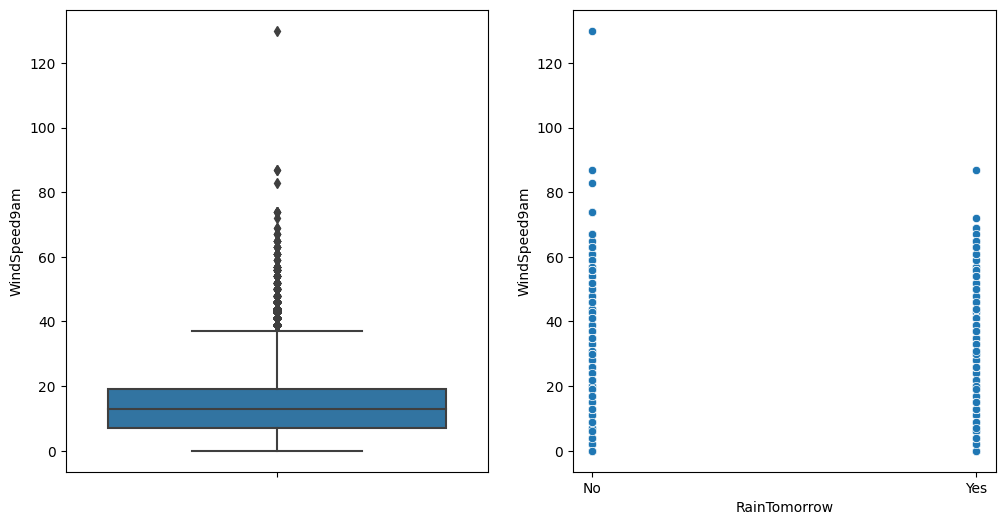

WindSpeed3pm


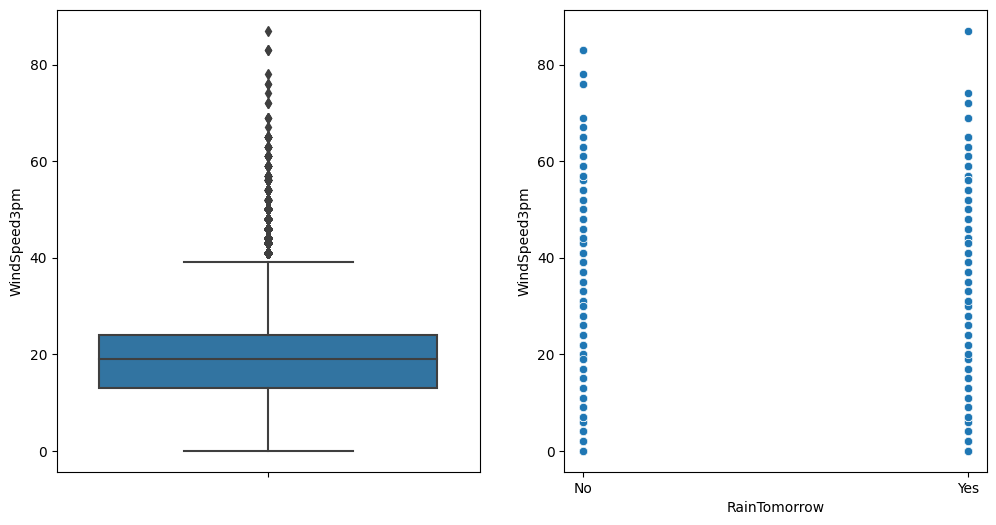

Humidity9am


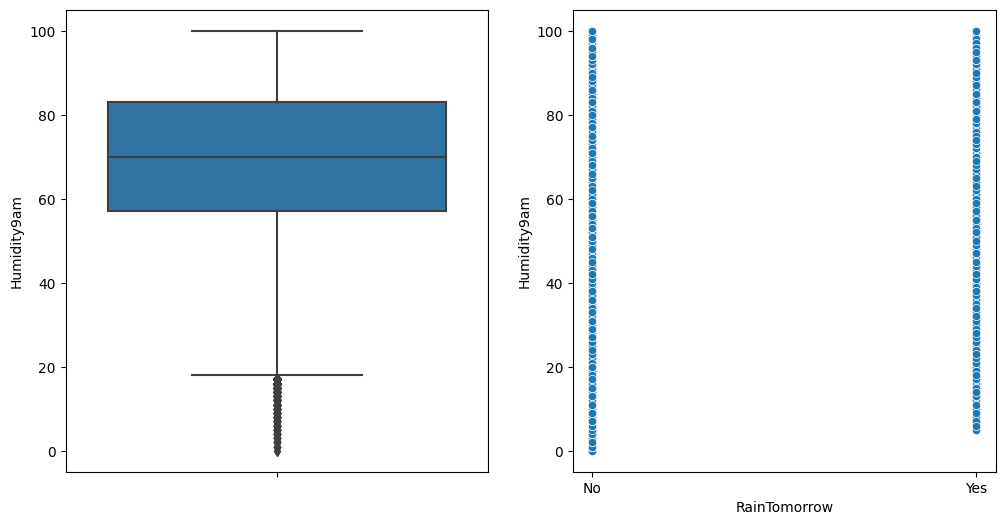

Humidity3pm


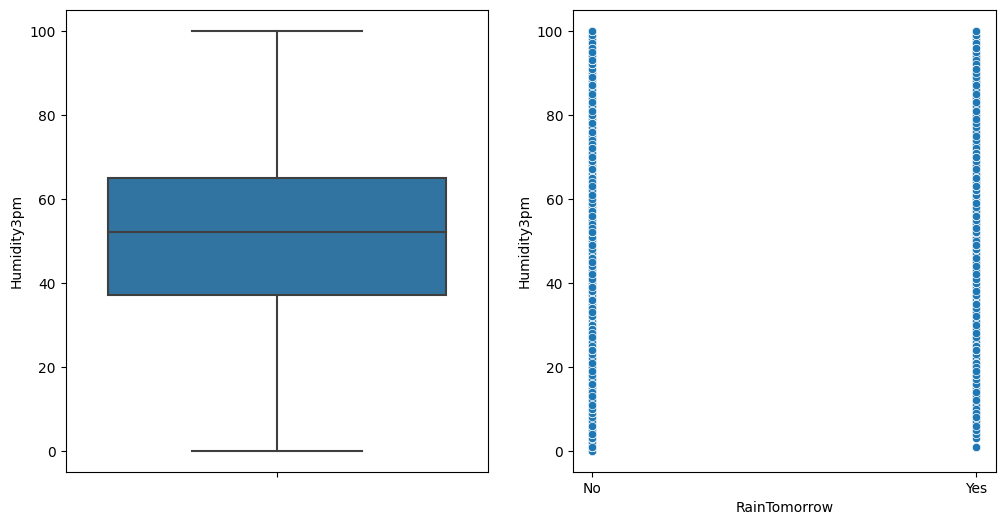

Pressure9am


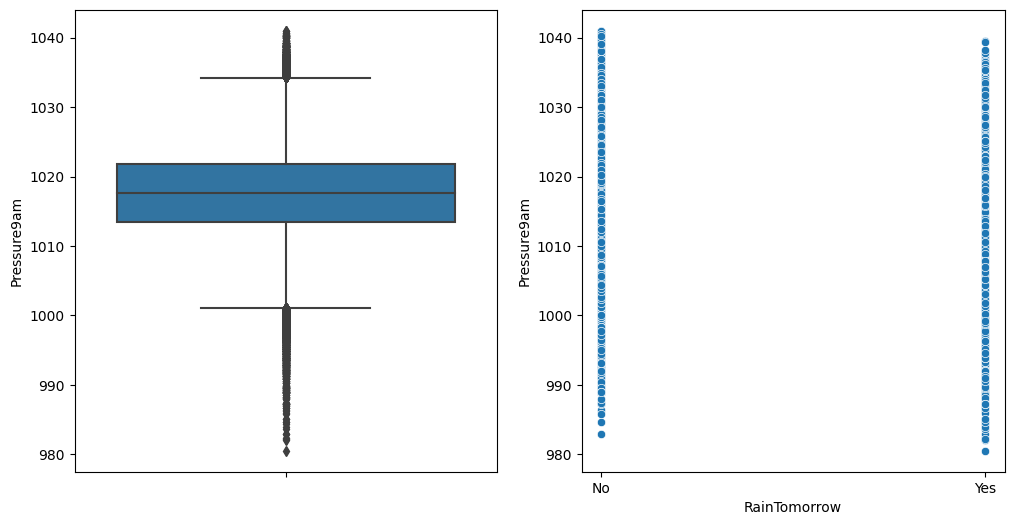

Pressure3pm


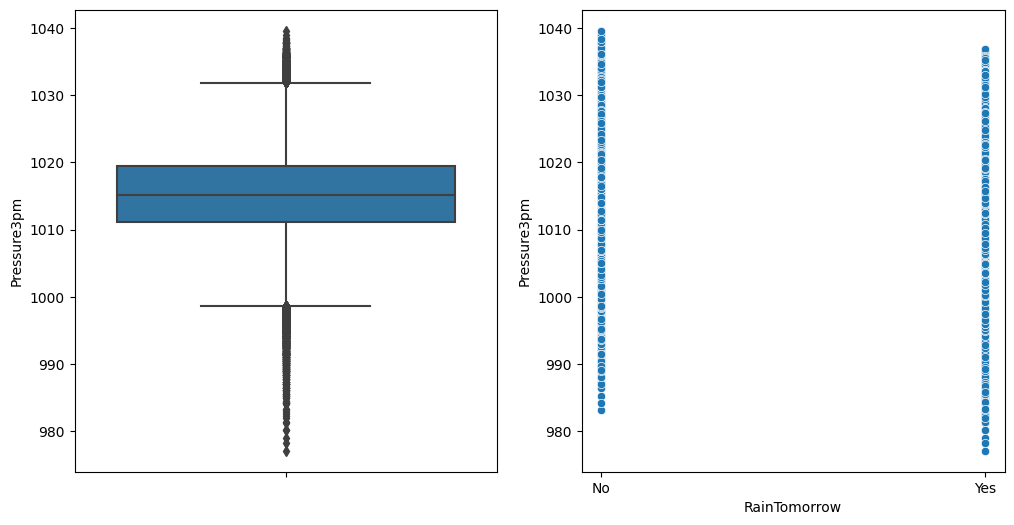

Cloud9am


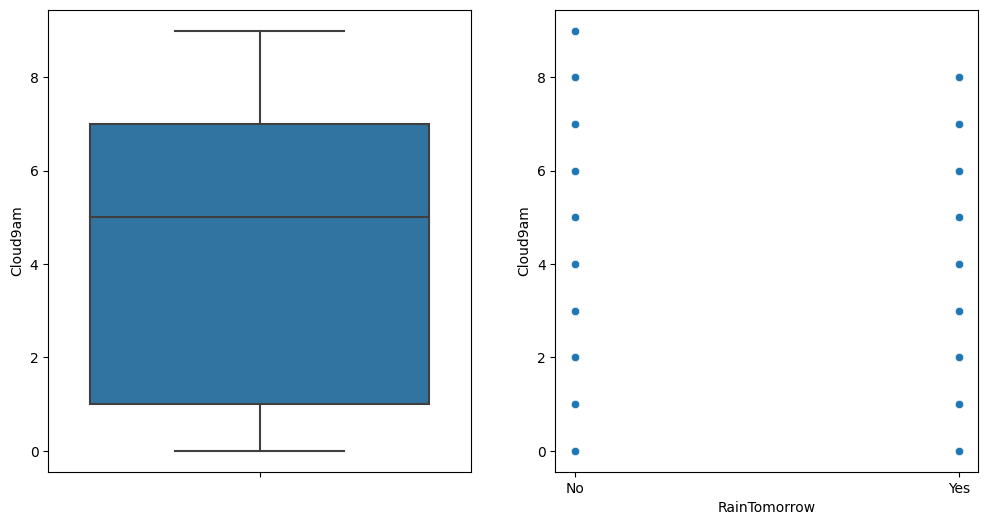

Cloud3pm


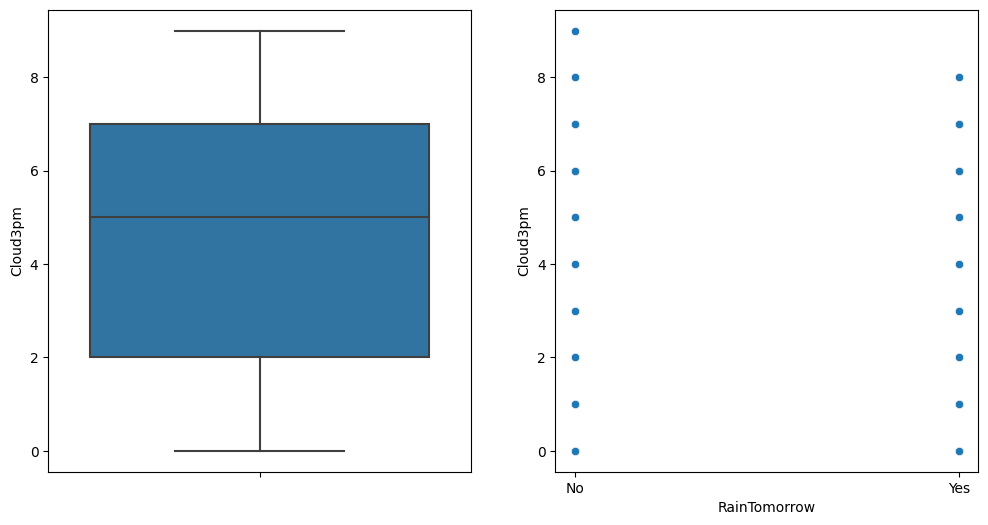

Temp9am


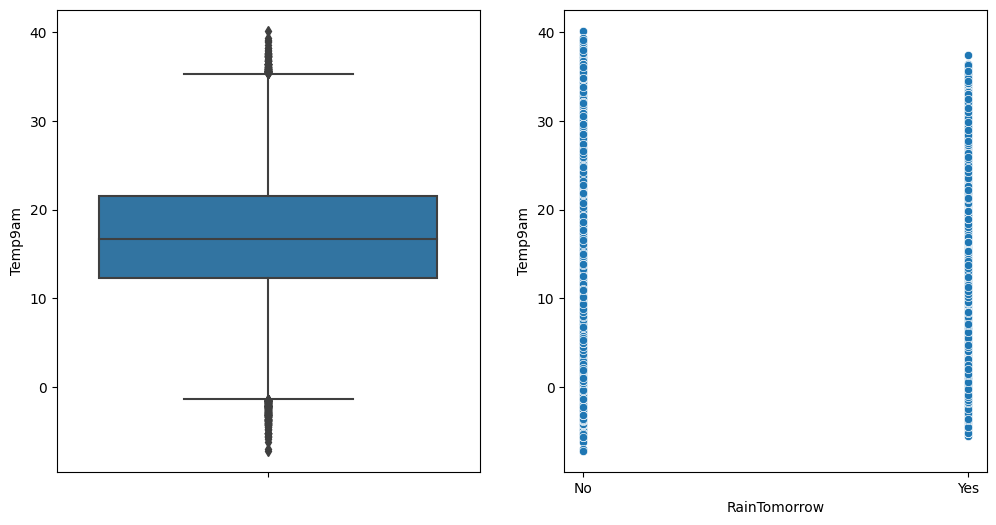

Temp3pm


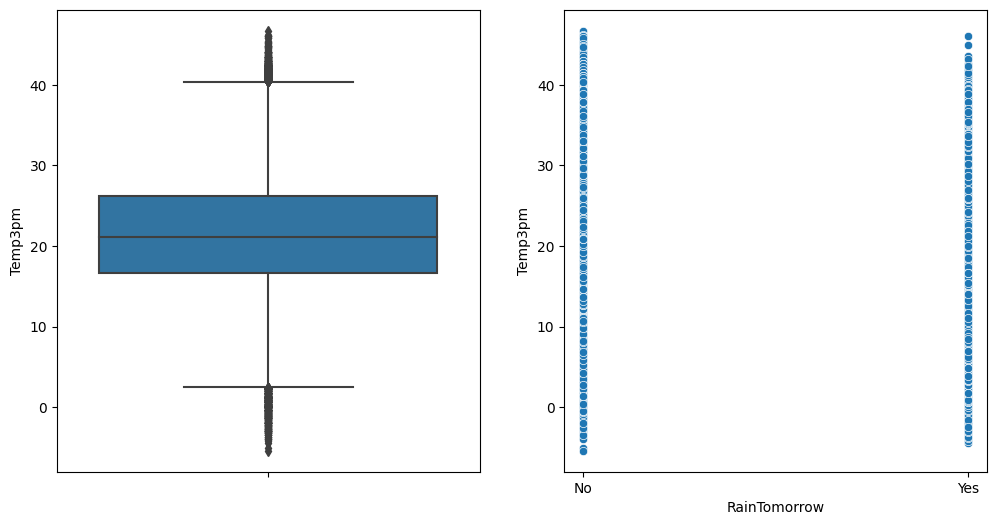

In [36]:
for col in num_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1, 2, 1)
  sns.boxplot(data=data,y=col)
  plt.subplot(1, 2, 2)
  sns.scatterplot(data=data,x='RainTomorrow',y=col)
  plt.show()

In [37]:
# MinTemp
x=data.loc[(data['MinTemp']>30)|(data['MinTemp']<-6)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MinTemp']<=30)&(data['MinTemp']>=-6)]

NO. of outliers = 76 
percentage of the outliers = 0.05%


In [38]:
# MaxTemp
x=data.loc[(data['MaxTemp']>45)|(data['MaxTemp']<1)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['MaxTemp']<=45)&(data['MaxTemp']>=1)]

NO. of outliers = 215 
percentage of the outliers = 0.15%


In [39]:
# Rainfall
x=data.loc[data['Rainfall']>55]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Rainfall']<=55]

NO. of outliers = 647 
percentage of the outliers = 0.45%


In [40]:
# Evaporation
x=data.loc[(data['Evaporation']>30)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Evaporation']<=30)]

NO. of outliers = 365 
percentage of the outliers = 0.25%


In [41]:
# WindGustSpeed
x=data.loc[data['WindGustSpeed']>=80]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindGustSpeed']<80]

NO. of outliers = 1638 
percentage of the outliers = 1.14%


In [42]:
# WindSpeed9am
x=data.loc[data['WindSpeed9am']>40]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed9am']<=40]

NO. of outliers = 972 
percentage of the outliers = 0.68%


In [43]:
# WindSpeed3pm
x=data.loc[data['WindSpeed3pm']>45]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['WindSpeed3pm']<=45]

NO. of outliers = 447 
percentage of the outliers = 0.32%


In [44]:
# Humidity9am
x=data.loc[data['Humidity9am']<=19]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[data['Humidity9am']>19]

NO. of outliers = 1705 
percentage of the outliers = 1.21%


In [45]:
# Pressure9am
x=data.loc[(data['Pressure9am']>1035)  |  (data['Pressure9am'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure9am']<=1035)  &  (data['Pressure9am'] >=1000)]

NO. of outliers = 1661 
percentage of the outliers = 1.19%


In [46]:
# Pressure3pm
x=data.loc[(data['Pressure3pm']>1032)  |  (data['Pressure3pm'] <1000)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Pressure3pm']<=1032)  &  (data['Pressure3pm'] >=1000)]

NO. of outliers = 1147 
percentage of the outliers = 0.83%


In [47]:
# Temp9am
x=data.loc[(data['Temp9am']>=35) | (data['Temp9am']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp9am']<35) & (data['Temp9am']>0)]

NO. of outliers = 332 
percentage of the outliers = 0.24%


In [48]:
# Temp3pm
x=data.loc[(data['Temp3pm']>40) | (data['Temp3pm']<=0)]
print('NO. of outliers =',x.shape[0],'\npercentage of the outliers =',str(round(x.shape[0]/data.shape[0]*100,2))+'%')
data=data.loc[(data['Temp3pm']<=40) & (data['Temp3pm']>0)]

NO. of outliers = 364 
percentage of the outliers = 0.27%


MinTemp


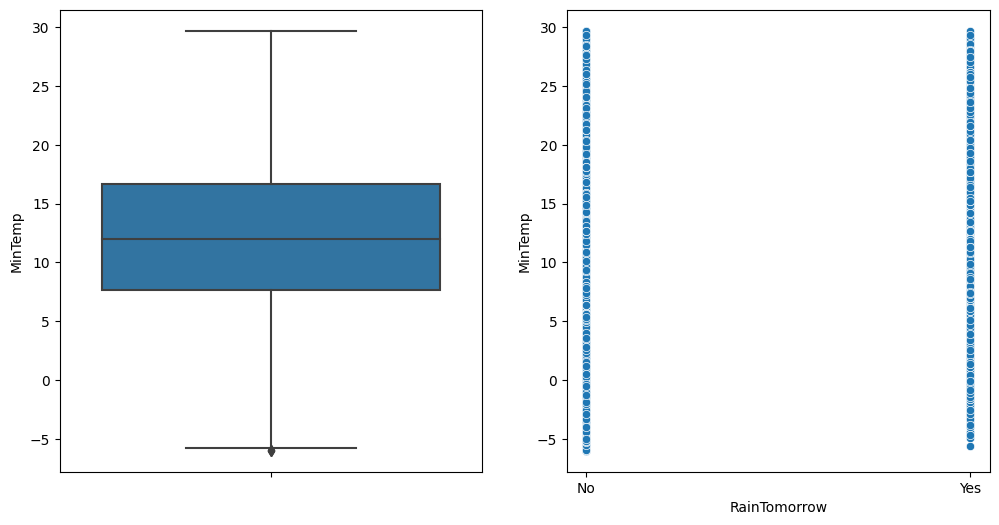

MaxTemp


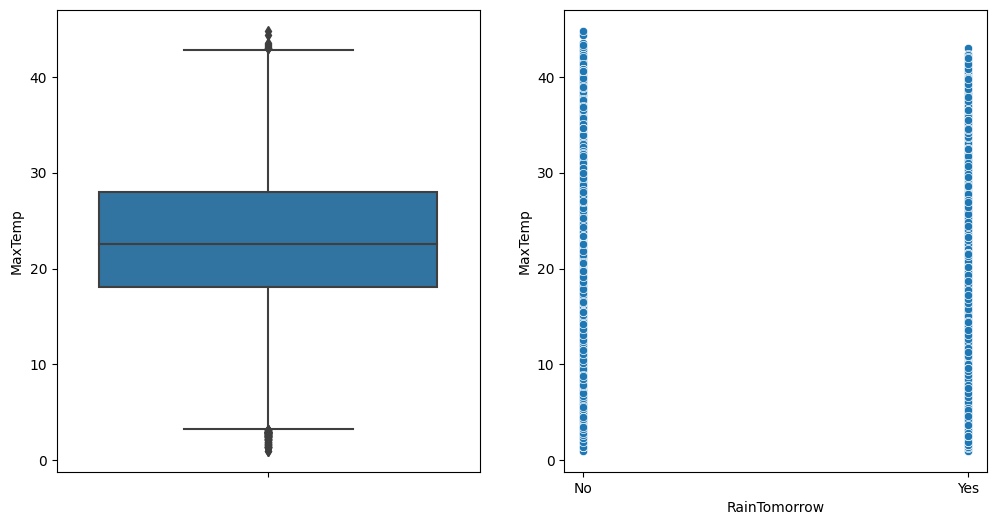

Rainfall


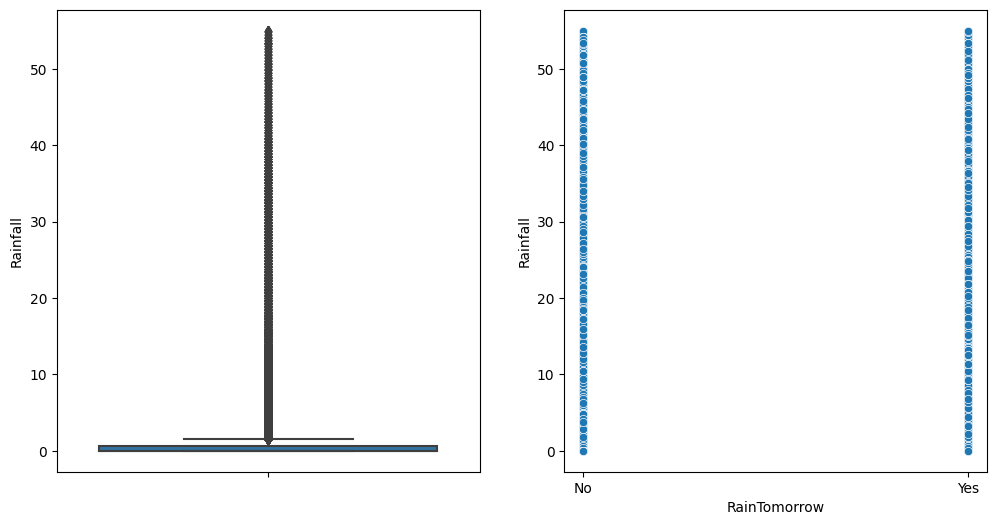

Evaporation


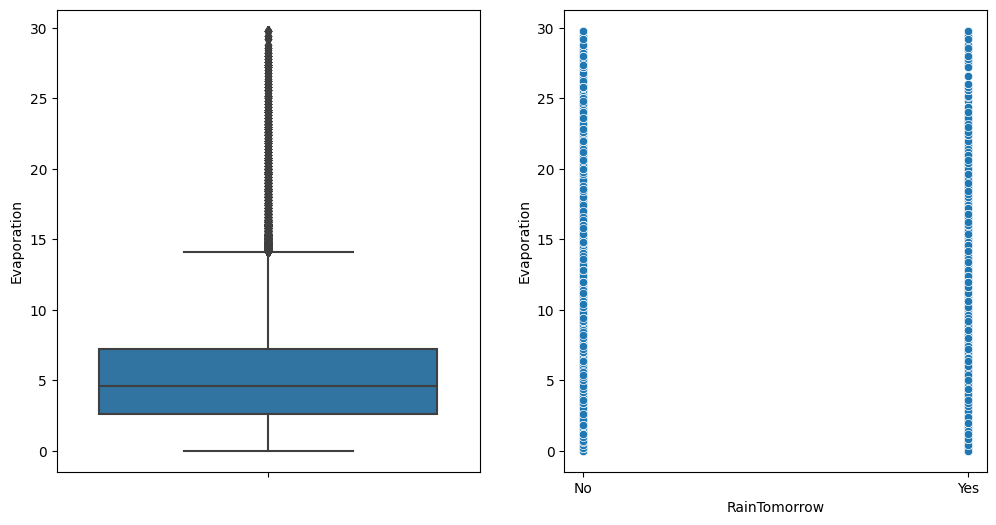

Sunshine


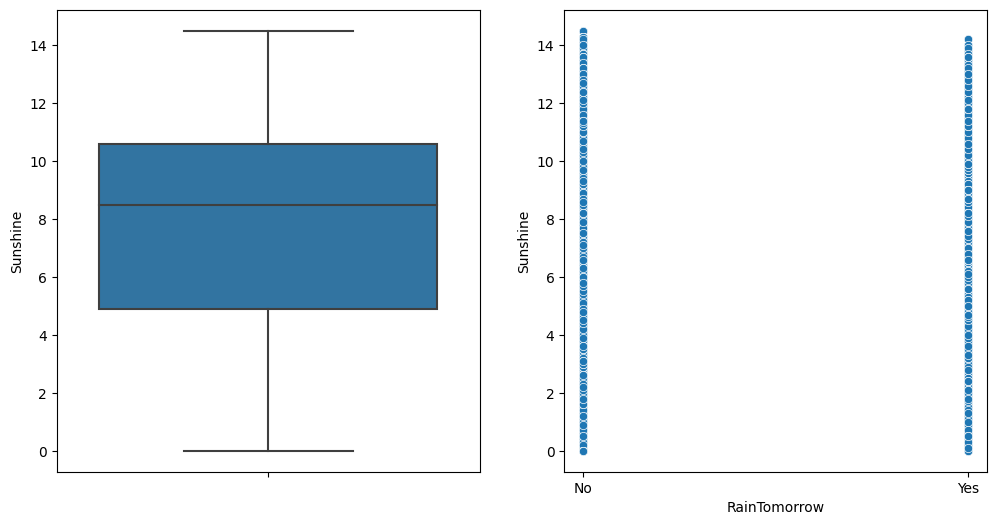

WindGustSpeed


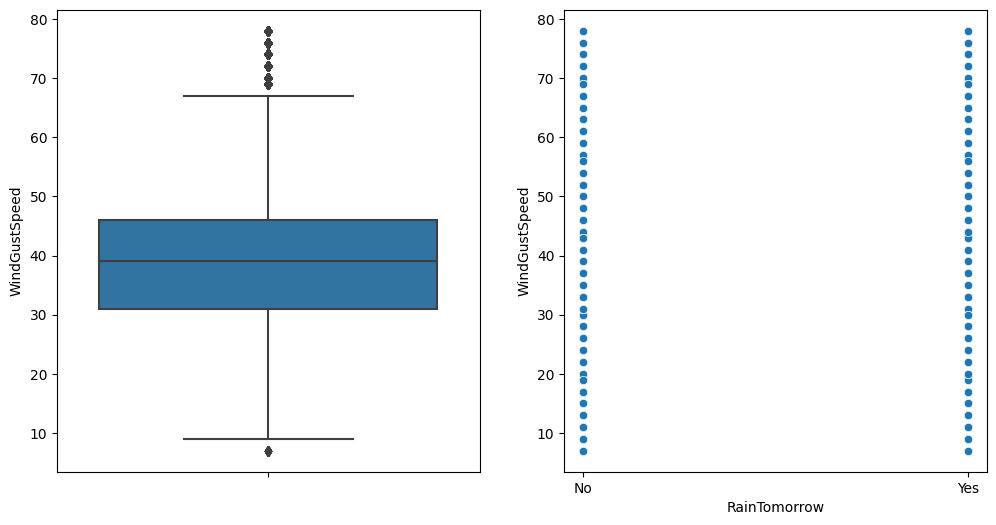

WindSpeed9am


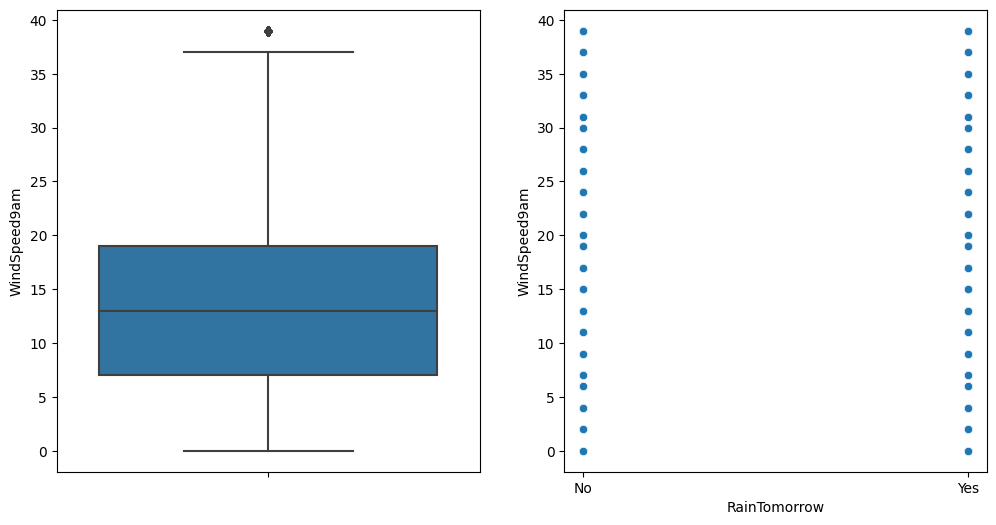

WindSpeed3pm


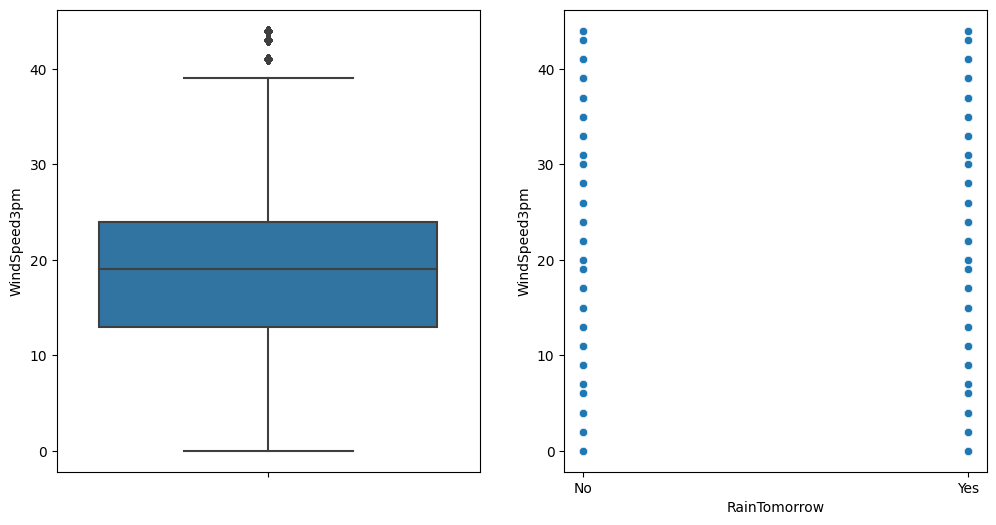

Humidity9am


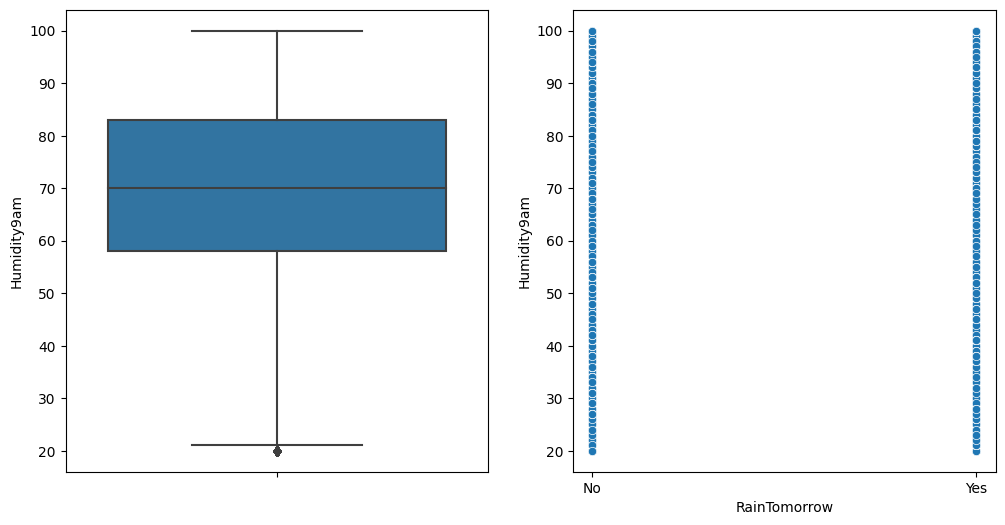

Humidity3pm


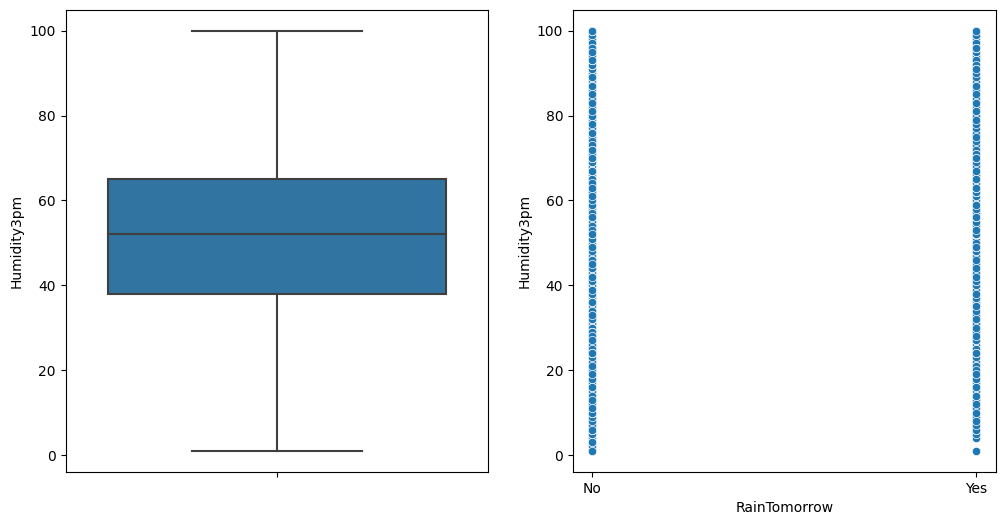

Pressure9am


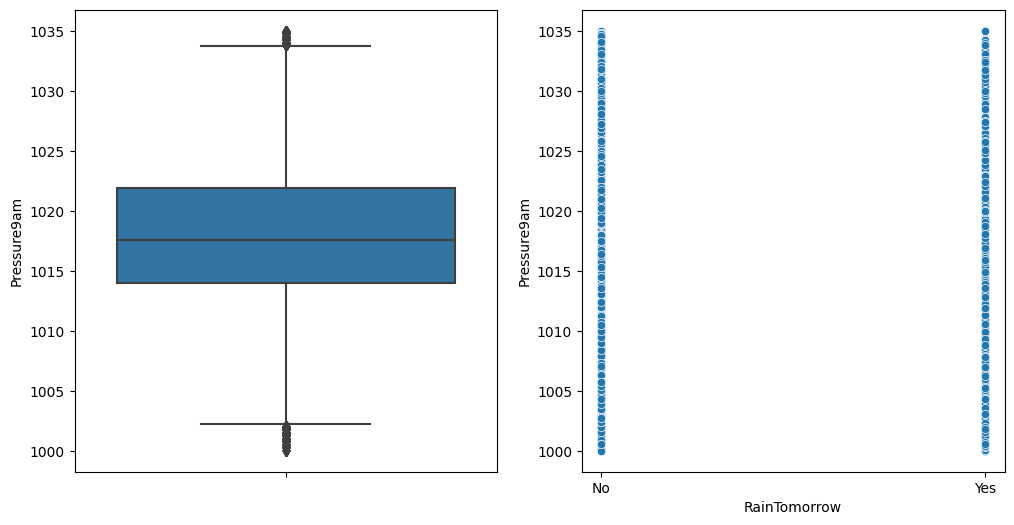

Pressure3pm


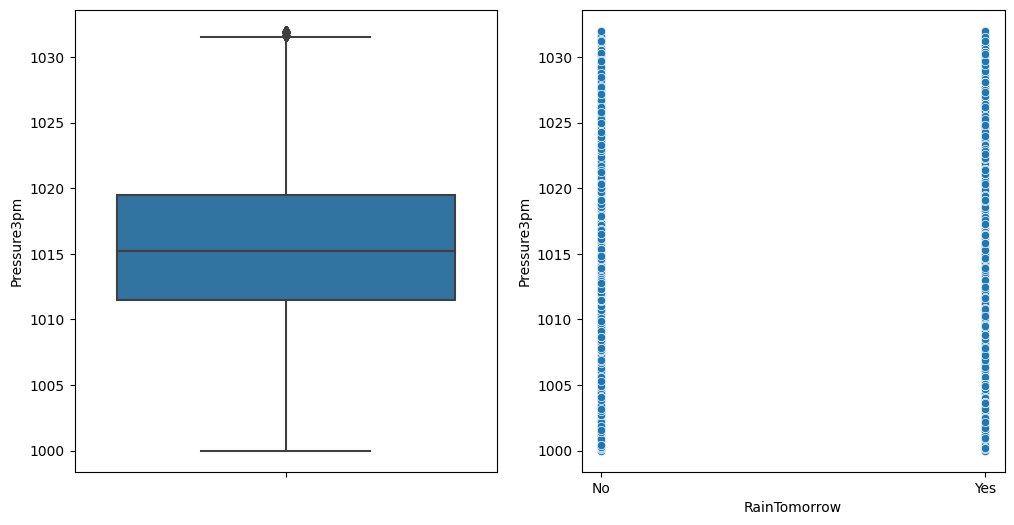

Cloud9am


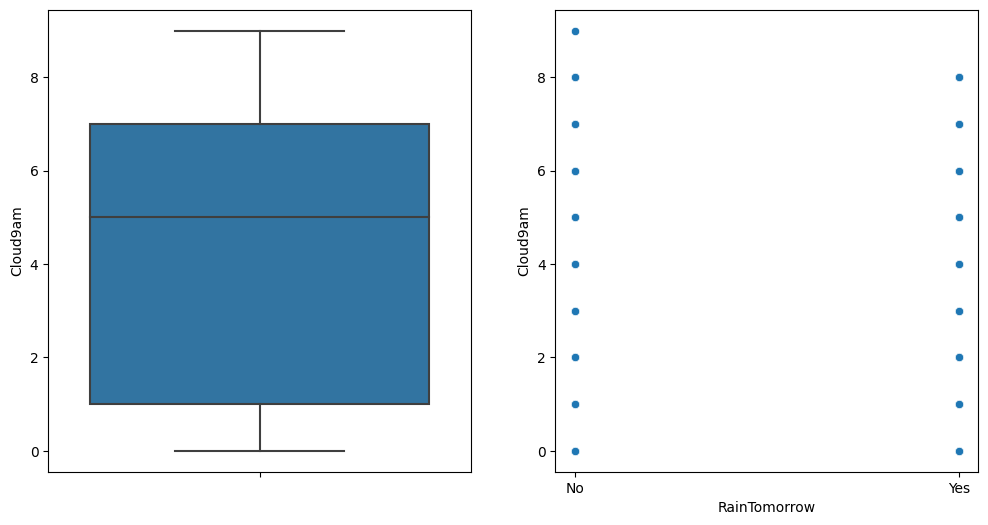

Cloud3pm


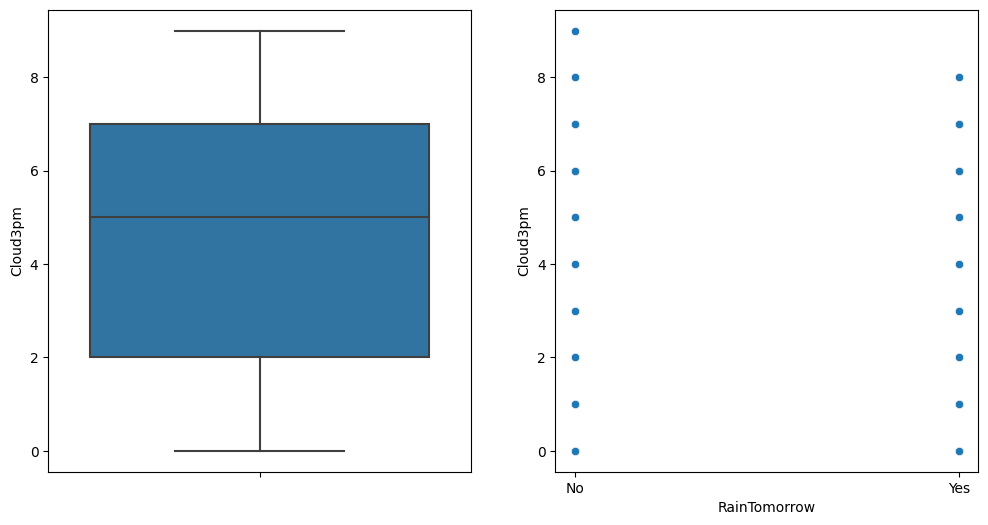

Temp9am


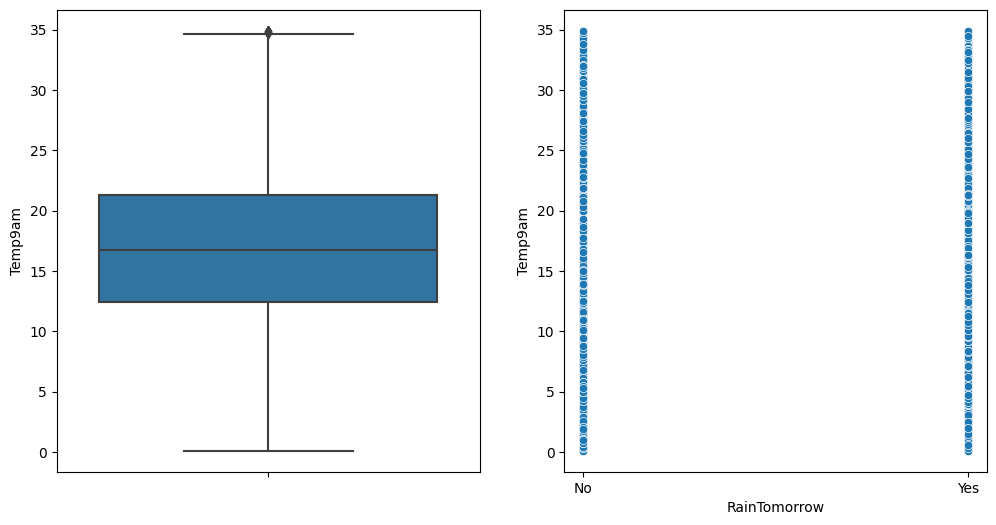

Temp3pm


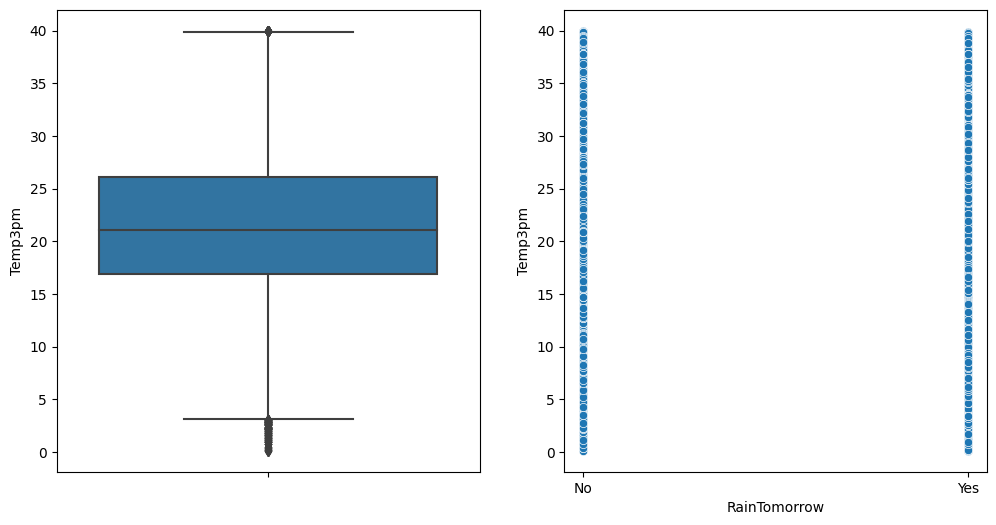

In [49]:
for col in num_cols:
  print(col)
  plt.figure(figsize = (12,6))
  plt.subplot(1, 2, 1)
  sns.boxplot(data=data,y=col)
  plt.subplot(1, 2, 2)
  sns.scatterplot(data=data,x='RainTomorrow',y=col)
  plt.show()

In [50]:
data.shape

(135891, 23)

### Заменяем все текстовые значения на числовые

In [51]:
#Encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [52]:
data['RainTomorrow'].head(10)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
9     0
10    1
11    1
Name: RainTomorrow, dtype: int32

Разбиваем наши данные на y и x:

In [53]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [54]:
X = data.drop(['RainTomorrow','Date'], axis = 1)
y = data['RainTomorrow']
feature_names = X.columns
print(feature_names)

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')


In [55]:
X=X.to_numpy()
y=y.to_numpy()

In [56]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[ 2.   7.4 25.1 ... 17.2 24.3  0. ]
 [ 2.  12.9 25.7 ... 21.  23.2  0. ]
 [ 2.   9.2 28.  ... 18.1 26.5  0. ]
 ...
 [41.   5.4 26.9 ... 12.5 26.1  0. ]
 [41.   7.8 27.  ... 15.1 26.   0. ]
 [41.  14.9 22.6 ... 15.  20.9  0. ]]

[0 0 0 ... 0 0 0]

(135891, 21)

(135891,)



Разделим наш dataset на обучающую и тестовую выборку:

In [57]:
import sys
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

95123 40768 (95123,) (40768,)


Интерпретируем все значения `y` как целые числа:

In [59]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [62]:
print(f"{err_train}")
print(f"{err_test}")

0.1361079865016873
0.1552688383045526


In [63]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[73090  2007]
 [10940  9086]]

[[30963  1234]
 [ 5096  3475]]



Попробуем теперь подобрать параметры так, чтобы еще сильнее уменьшить ошибку:

In [65]:
for n in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)

    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))

    print("n ", n)
    print("err_train ", err_train)
    print("err_test ", err_test)

n  1
err_train  0.0
err_test  0.19956828885400313
n  2
err_train  0.10552652881006697
err_test  0.17207123233908947
n  3
err_train  0.10046991789577704
err_test  0.17008437990580846
n  4
err_train  0.1224940340401375
err_test  0.16338795133437992
n  5
err_train  0.11842561735857784
err_test  0.16083693092621665


Лучший результат в 16% достигается при n=5

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.


# Домашнее задание 5

## Нейронная сеть

### Нейронная сеть с двумя скрытыми слоями, подбор оптимального alpha

In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [67]:
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,50,), 
                              solver = 'adam',
                              activation = 'relu',
                              max_iter=1000,
                              random_state = 1)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

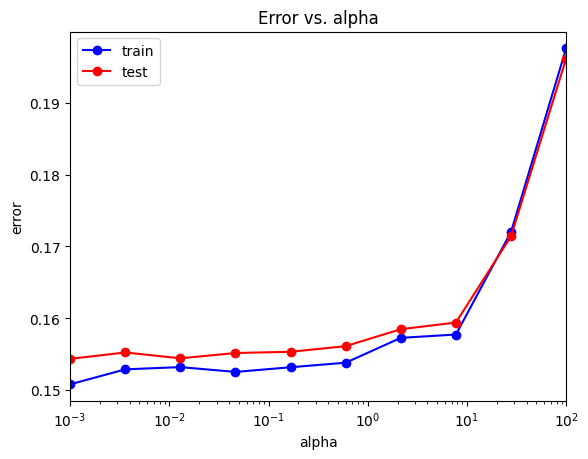

In [68]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

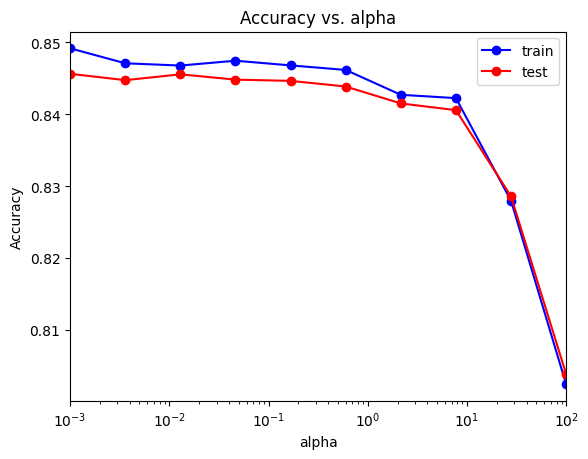

In [69]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [70]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.15081526024200245 0.15436126373626374


#### Выбираем alpha

In [71]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.001]


In [86]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (50,50,),
                          solver = 'adam', activation = 'relu', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.15476803717292348
0.15605376766091053


In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[32197  8571]
 [    0     0]]


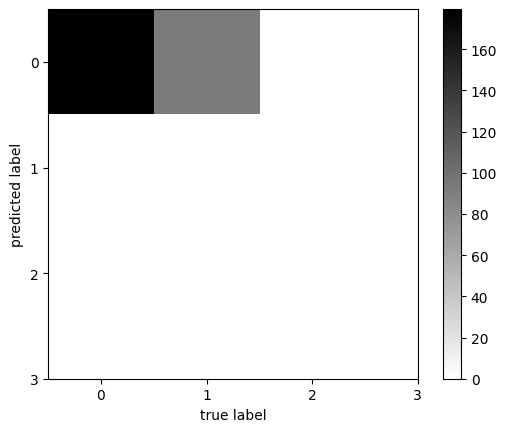

In [74]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

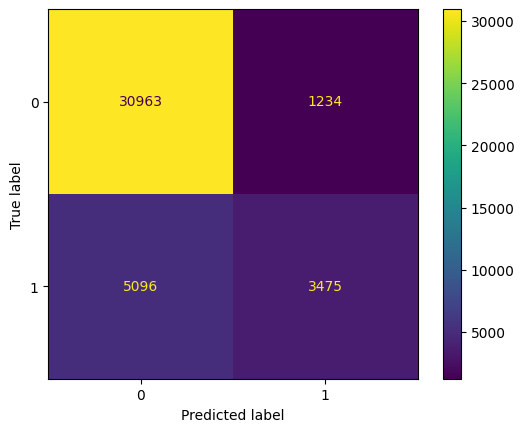

In [76]:
cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [77]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     32197
           1       0.00      0.00      0.00      8571

    accuracy                           0.79     40768
   macro avg       0.39      0.50      0.44     40768
weighted avg       0.62      0.79      0.70     40768



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Подбор числа нейронов и альфа

In [78]:
num_elems_arr = [x for x in range(10, 101, 10)]
alpha_arr = np.logspace(-3, 2, 11)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, num_elems in enumerate(num_elems_arr):
    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (num_elems,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
        mlp_model.fit(X_train, y_train)
        y_train_pred = mlp_model.predict(X_train)
        y_test_pred = mlp_model.predict(X_test)
        train_err[index] = np.append(train_err[index], np.mean(y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(y_test != y_test_pred))
        train_acc[index] = np.append(train_acc[index], accuracy_score(y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(y_test, y_test_pred))
        
    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])
    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err
    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

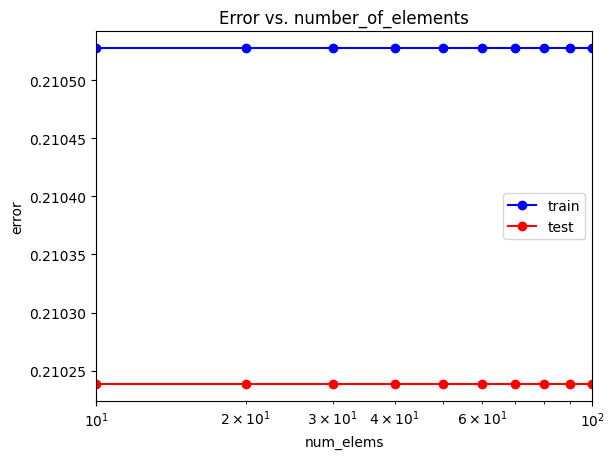

In [79]:
plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Error vs. number_of_elements')
plt.xlabel('num_elems')
plt.ylabel('error')
plt.legend()

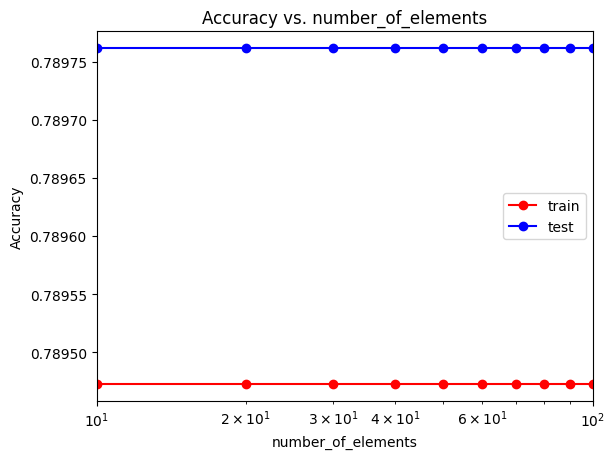

In [80]:
plt.semilogx(num_elems_arr, min_train_accuracy, 'r-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_accuracy, 'b-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Accuracy vs. number_of_elements')
plt.xlabel('number_of_elements')
plt.ylabel('Accuracy')
plt.legend()

In [81]:
print(min_test_errors[5])
print(alpha_opts[5])

0.21023842229199372
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02]


Вывод: лучший результат в 15.6% был достигнут при alpha = 0.001 и количестве нейронов 100

## Random forest classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(25,201,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)

    y_test_predict = rfc.predict(X_test)
    err_train = np.mean(y_train != rfc.predict(X_train))
    err_test  = np.mean(y_test  != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  25
err_train: 0.0016294692135445687
err_test: 0.15190835949764522
---------
n_estimators =  50
err_train: 0.00037845736572648047
err_test: 0.14928375196232338
---------
n_estimators =  75
err_train: 3.1538113810540035e-05
err_test: 0.14707613814756673
---------
n_estimators =  100
err_train: 2.1025409207026692e-05
err_test: 0.1472723704866562
---------
n_estimators =  125
err_train: 1.0512704603513346e-05
err_test: 0.14714972527472528
---------
n_estimators =  150
err_train: 0.0
err_test: 0.14616856357927788
---------
n_estimators =  175
err_train: 0.0
err_test: 0.14756671899529042
---------
n_estimators =  200
err_train: 0.0
err_test: 0.14737048665620095
---------
best: 0.0 0.14616856357927788


Text(0, 0.5, 'error')

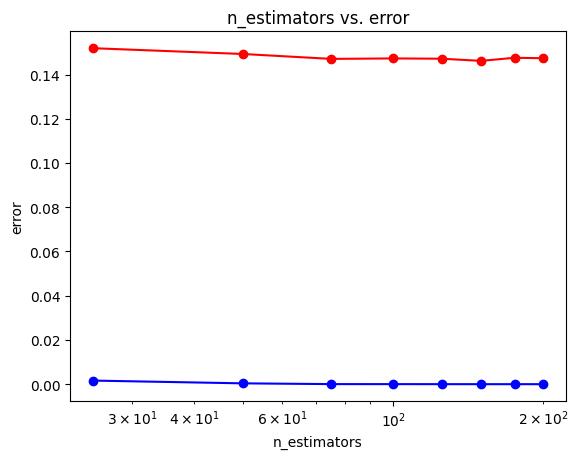

In [83]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [87]:
rfc = RandomForestClassifier(n_estimators=75)
rfc.fit(X_train, y_train)

y_test_predict = rfc.predict(X_test)
err_train = np.mean(y_train != rfc.predict(X_train))
err_test  = np.mean(y_test  != y_test_predict)

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[30782  4654]
 [ 1415  3917]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     32197
           1       0.77      0.37      0.50      8571

    accuracy                           0.84     40768
   macro avg       0.81      0.67      0.70     40768
weighted avg       0.83      0.84      0.82     40768



Самый лучший результат для Random forest classifier - 14.7% ошибки на тестовой выборке.

## Логистическая регрессия

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)

err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_predict))

err_train=0.15622930311281183
err_test=0.1578689167974882

[[30606  4845]
 [ 1591  3726]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32197
           1       0.70      0.43      0.54      8571

    accuracy                           0.84     40768
   macro avg       0.78      0.69      0.72     40768
weighted avg       0.83      0.84      0.83     40768



Результат: 15.6%

## Общие выводы

* Самый лучший результат показал метод Random forest classifier с ошибкой в 14.7%
* Модель подвержена переобученности
* Лучше всего было использовать Random forest из-за простоты подбора параметра и скорости работы
* Random forest сумел обойти kNN на 1.3%